In [1]:
!pip install numpy
!pip install pandas
!pip install transformers


In [2]:
import numpy as np 
import pandas as pd 


df = pd.read_csv('datasetV1.csv')
df.head()

,ID,Summary,Number of Reviews
0,5524631,Located 15 minutes from downtown in desirable ...,0.0
1,16976743,Charming yet Trendy Retreat- in my 2 bedroom w...,3.0
2,18345659,Our 300 sq. feet King rooms feature floor-to-c...,0.0
3,15716232,"1 Bdrm Brownstone, sleeps 2. Steps from KINGST...",0.0
4,6556848,Grab your friends and make this two bedroom Br...,10.0


In [3]:

df = df.sample(frac=0.04, random_state=42)

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

from transformers import BertPreTrainedModel, BertModel, BertTokenizer

from sklearn import metrics
from sklearn.model_selection import train_test_split
from tqdm import tqdm, trange
import torch

'''
# Check if GPU is available
if torch.cuda.is_available():
    # Set the default tensor type to CUDA tensor
    torch.set_default_tensor_type(torch.cuda.FloatTensor)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

torch.set_default_device(device)'''


/home/bob/anaconda3/envs/newenvn/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'\n# Check if GPU is available\nif torch.cuda.is_available():\n    # Set the default tensor type to CUDA tensor\n    torch.set_default_tensor_type(torch.cuda.FloatTensor)\ndevice = torch.device("cuda" if torch.cuda.is_available() else "cpu")\n\ntorch.set_default_device(device)'

In [5]:
import os
os.environ['TOKENIZERS_PARALLELISM']= "false"

In [6]:
df['SummaryClean']= df['Summary'].map(lambda x : str(x))

In [7]:
len(df.SummaryClean.tolist())

537

In [8]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
tokenizer = AutoTokenizer.from_pretrained("Ashishkr/query_wellformedness_score")
model = AutoModelForSequenceClassification.from_pretrained("Ashishkr/query_wellformedness_score")

Some weights of the model checkpoint at Ashishkr/query_wellformedness_score were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [10]:
features

{'input_ids': tensor([[    0,  6785, 30123,  ...,     1,     1,     1],
        [    0,  8816,  2855,  ...,     1,     1,     1],
        [    0, 42370,  1514,  ...,     1,     1,     1],
        ...,
        [    0, 17629,     7,  ...,     1,     1,     1],
        [    0,   574,  7073,  ...,     1,     1,     1],
        [    0, 10197,     2,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [11]:
scores = []
model.eval()
with torch.no_grad():

    for i in df.SummaryClean.tolist():
        feature = tokenizer([i], padding=True, truncation=True, return_tensors="pt")
        scores.append(model(**feature).logits)


In [12]:
scores

[tensor([[0.4711]]),
 tensor([[0.2417]]),
 tensor([[0.5363]]),
 tensor([[0.1966]]),
 tensor([[0.3304]]),
 tensor([[0.2130]]),
 tensor([[0.2043]]),
 tensor([[0.1405]]),
 tensor([[0.2166]]),
 tensor([[0.2582]]),
 tensor([[0.6597]]),
 tensor([[0.2071]]),
 tensor([[0.4569]]),
 tensor([[0.5788]]),
 tensor([[0.2795]]),
 tensor([[0.3852]]),
 tensor([[0.3507]]),
 tensor([[0.5453]]),
 tensor([[0.2483]]),
 tensor([[0.3940]]),
 tensor([[0.5638]]),
 tensor([[0.1532]]),
 tensor([[0.1789]]),
 tensor([[0.1797]]),
 tensor([[0.2897]]),
 tensor([[0.3145]]),
 tensor([[0.1793]]),
 tensor([[0.2986]]),
 tensor([[0.4076]]),
 tensor([[0.2014]]),
 tensor([[0.0919]]),
 tensor([[0.3248]]),
 tensor([[0.8090]]),
 tensor([[0.3216]]),
 tensor([[0.2071]]),
 tensor([[0.4141]]),
 tensor([[0.2071]]),
 tensor([[0.3878]]),
 tensor([[0.7448]]),
 tensor([[0.4095]]),
 tensor([[0.2685]]),
 tensor([[0.4251]]),
 tensor([[0.2071]]),
 tensor([[0.4414]]),
 tensor([[0.0761]]),
 tensor([[0.3951]]),
 tensor([[0.1826]]),
 tensor([[0.2

In [13]:
scores[0]

tensor([[0.4711]])

In [14]:
!pip install matplotlib

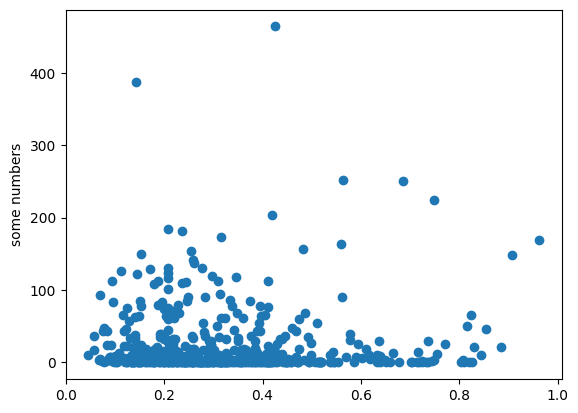

In [18]:
import matplotlib.pyplot as plt

# Create some sample data
x = df['Number of Reviews'].map(lambda x: float(x))
y_values = list(map(lambda x: float(x),scores))

# Plot the data
plt.scatter(y_values,x)
plt.ylabel('some numbers')  # Add a label to the y-axis
plt.show()  # Display the plot


In [19]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification",
                      model="facebook/bart-large-mnli")

config.json: 100%|██████████| 1.15k/1.15k [00:00<00:00, 3.33MB/s]
model.safetensors: 100%|██████████| 1.63G/1.63G [00:33<00:00, 49.1MB/s]
tokenizer_config.json: 100%|██████████| 26.0/26.0 [00:00<00:00, 83.6kB/s]
vocab.json: 100%|██████████| 899k/899k [00:00<00:00, 2.45MB/s]
merges.txt: 100%|██████████| 456k/456k [00:00<00:00, 1.68MB/s]
tokenizer.json: 100%|██████████| 1.36M/1.36M [00:00<00:00, 2.95MB/s]


In [34]:
sequence_to_classify = df.SummaryClean.to_numpy()[0]
candidate_labels = ['travel','fun', 'beach', 'house']
classifier(sequence_to_classify, candidate_labels,multi_label=True)

{'sequence': 'Just Steps to the Ocean! This lovely lower story duplex home was fully remodeled in May of 2011. It is located just 5 houses from the ocean with an ocean view patio area allowing you to fully enjoy the California lifestyle!',
 'labels': ['house', 'fun', 'beach', 'travel'],
 'scores': [0.9402497410774231,
  0.9278727769851685,
  0.7628886699676514,
  0.4482495188713074]}

In [27]:
df.SummaryClean.to_numpy()[0]

'Just Steps to the Ocean! This lovely lower story duplex home was fully remodeled in May of 2011. It is located just 5 houses from the ocean with an ocean view patio area allowing you to fully enjoy the California lifestyle!'